<a href="https://colab.research.google.com/github/laura-turnbull-lloyd/STDH_teaching/blob/main/STDH2324_Lecture_5_Part_B_distributions_probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction
We are going to put into practice the concepts that we have covered in the lecture.

First, we will importat the modules that allow you to import, analyse and plot data.




In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from scipy import stats

# import operating system functions
import os


# Exercise 1
## Loading data
To access the data you are going to work with in this excercise, you need to download it from Learn Ultra and then upload it to the colab session.

To check the current working directory (i.e. the location where python is going to look for data), we can use the 'get current working directory command'and print out its name.

In [2]:
print(os.getcwd())


/content


Then we can load the data by clicking on the files tab and then clicking on the 'upload to session storage' button. Navigate to the 'worldwide_earthquakes_2000_2008.csv' file you downloaded from Learn Ultra and upload it.

Then, you are ready to read in the data:

In [3]:
# load the frequency-magnitude data
Filename = 'worldwide_earthquakes_2000_2008.csv' # specifying the name of the file to be read in
earthquake_data = pd.read_csv(Filename)

We can quickly view the data to check it looks okay by printing it out

In [4]:
earthquake_data

,Magnitude,Magnitude_bin,Total
0,8 >,8,12
1,7 - 7.9,7,103
2,6 - 6.9,6,1164
3,5 - 5.9,5,11870
4,4 - 4.9,4,83368
5,3 - 3.9,3,62597
6,2 - 2.9,2,40687


## Plotting the frequency-magnitude relation
Let's plot the data to see what this frequency-magnitude relation of earthquakes worldwide between 2000 and 2008 looks like.

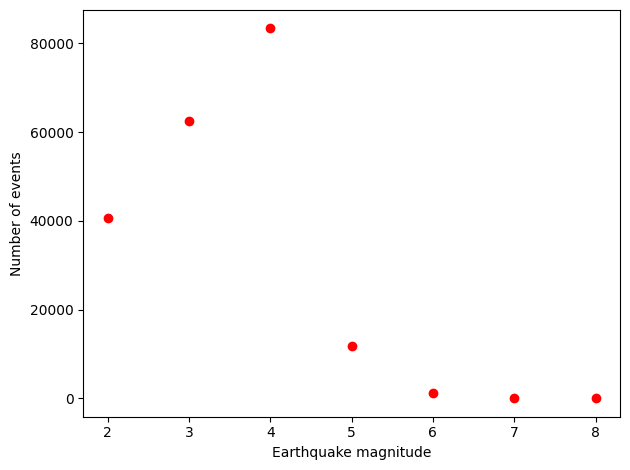

In [5]:
# set up a figure and set of axes for plotting
fig, ax = plt.subplots()

# make a magnitude-frequency scatter plot (coloured red)
ax.plot(earthquake_data.Magnitude_bin, earthquake_data.Total, 'o', color='red')
plt.xlabel("Earthquake magnitude")
plt.ylabel("Number of events")
plt.tight_layout() # makes the plot look nicer!

To make it easier to differentiate between the high-magnitude events, we can plot these quantities on logarithmic axes, which is often much more revealing.

Recall that earthquake magnitude is already on a log scale. Therefore, we only need to modify the above plot to show event frequency on a log scale.

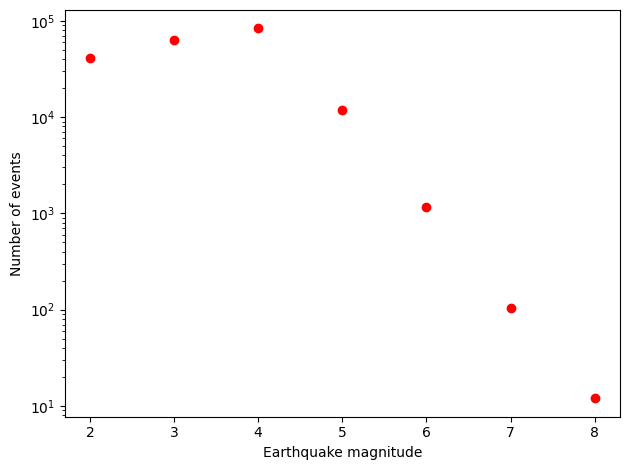

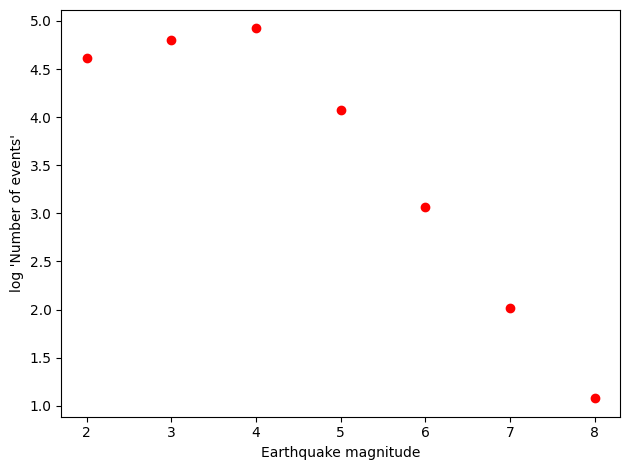

In [6]:
# recreate the above plot but with "event frequency" on a logarithmic scale
fig, ax = plt.subplots()
ax.plot(earthquake_data.Magnitude_bin, earthquake_data.Total, 'o', color='red')
ax.set_yscale('log')
plt.xlabel("Earthquake magnitude")
plt.ylabel("Number of events")
plt.tight_layout()

#or we can plot it a different way by logging event frequency values
fig, ax = plt.subplots()
ax.plot(earthquake_data.Magnitude_bin, np.log10(earthquake_data.Total), 'o', color='red')
plt.xlabel("Earthquake magnitude")
plt.ylabel("log 'Number of events'")
plt.tight_layout()


Note the difference in the two plots. In the first we have logged the axes values, whilst in the second we have logged the frequency values. Either way, you can see that above a certain earthquake magnitude there is a clear predictable relation between earthquake magnitude and frequency.

##Exploring the earthquake power law relation

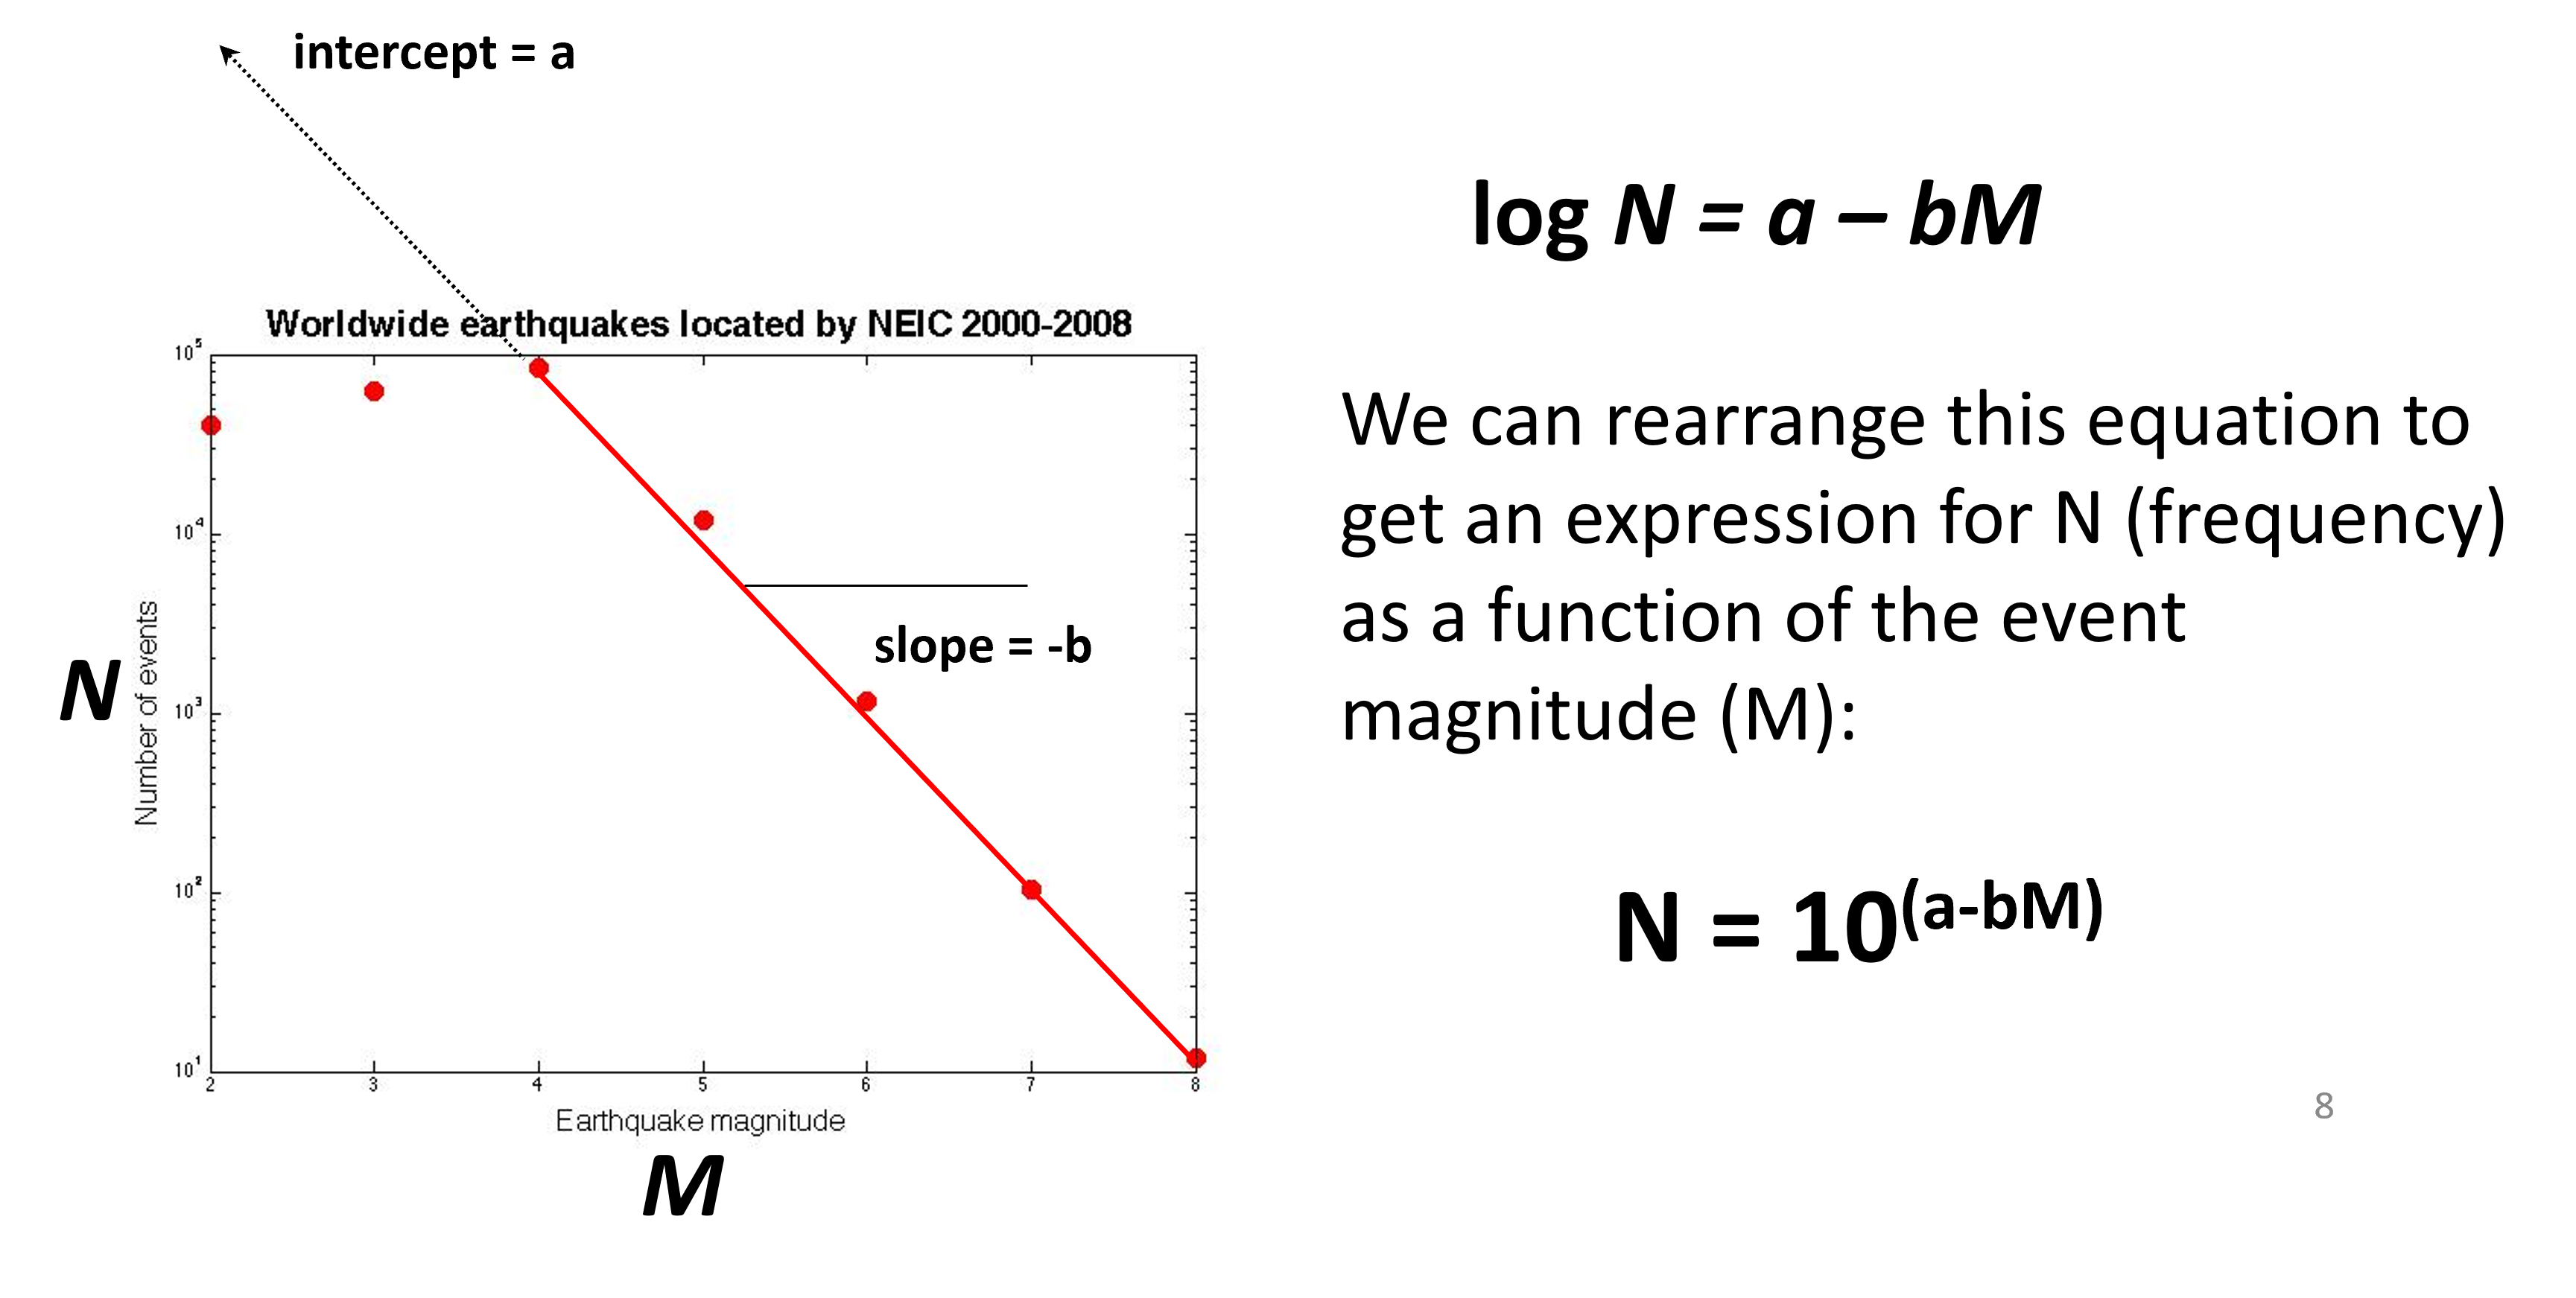

To recap, the ***a*** parameter determines how many events (***N***) occur of a given magnitude, and the ***b*** parameter determines how rapidly the number of events decreases as the earthquake magnitude (***M***) goes up.

## Frequency-magnitude relation and the b parameter

Now we will explore how changing the a and b parameters alters the frequency-magnitude relation of earthquakes.

Recall from earlier that to raise a number to a power in python we use the '**' operator.



In [7]:
# define a range of earthquake magnitudes from 4 to 8 in increments of 0.5
M = np.arange(4.,8.,0.5) # creates a sequence of numbers
a = 5
b = 0.7
N = 10**(a-(b*M))

print(N)

[158.48931925  70.79457844  31.6227766   14.12537545   6.30957344
   2.81838293   1.25892541   0.56234133]


Let's plot out the results.

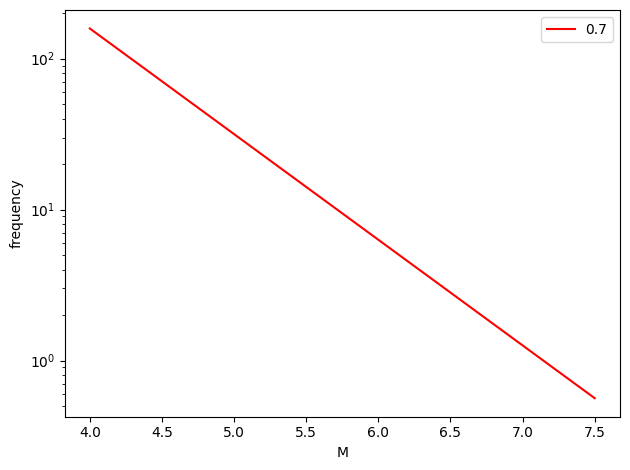

In [9]:
fig, ax = plt.subplots()
ax.plot(M, N, '-', color='red', label = b)
ax.set_yscale('log')
ax.legend()
plt.xlabel("M")
plt.ylabel("frequency")
plt.tight_layout()

##Sensitivity of the frequency-magnitude relation to the b-value
One of the advantages of coding in this way is that it's really easy to redo calculations, just by changing one parameter value.

Now we'll have a go at changing the b-value in the code below, and see how it changes the slope of the frequency magnitude relation. Then have a go at changing the a parameter.

In [ ]:
# have a go at first changing the b parameter and then the a parameter
a = 5.0
b = 0.7

# run the equation again with new parameter values
N = 10**(a-(b*M))

# plot the new result with a red line
ax.plot(M,N,'-', color='green', label = b)
ax.set_yscale('log')
ax.legend()

# display the updated figure
fig



***What does the frequency-magnitude relation look like if you set the b value to 1?***

***Can you describe the difference in the frequency magnitude relation for b-values of 0.7 and 1?***

***What does it mean in terms of the frequency magnitude distribution when the a value is higher?***


## Calculate the b value for the worldwide earthquake data
Now, for the worldwide dataset you opened before, we're going to calculate the b-value.

In [13]:
coefficients, residual, rank, singular_values, rcondition = np.polyfit(
        earthquake_data.Magnitude_bin, np.log(earthquake_data.Total), deg=1, full=True)
b, a = coefficients

Add the linear regression model to the plot

In [14]:
regression = b*earthquake_data.Magnitude_bin + a

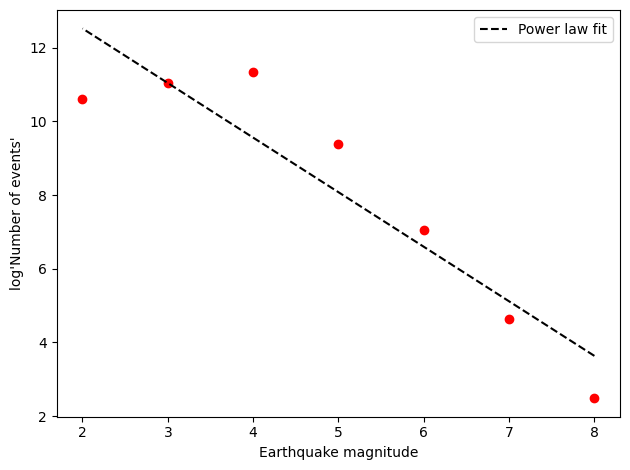

In [15]:
fig, ax = plt.subplots()
ax.plot(earthquake_data.Magnitude_bin, np.log(earthquake_data.Total), 'o', color='red')
plt.xlabel("Earthquake magnitude")
plt.ylabel("log'Number of events'")

# plot the linear regression as a line
plt.plot(earthquake_data.Magnitude_bin, regression, color='black', linestyle='--', label = 'Power law fit')
plt.legend()
plt.tight_layout()


**Do you think this is a very good fit? What might you do to improve the power law fit?**

We can print out the residual value from the model fit, which is the sum of squared errors:



In [ ]:
print(residual)

To improve the model fit, we would try to reduce the residual value (i.e. the sum of squared errors).

We'll come back to this issue of model fit next.

#Exercise 2

##Cumulative versus non-cumulative distributions
So far, we've been looking at non-cumulative distributions -- we put the data into bins and we've looked at the frequency-magnitude relation based on the binned data.

In a risk context, we're usually more interested in the probability of an event of a certain magnitude being exceeded. In the case of earthquakes, this can be expressed by the Gutenberg-Richter relation where the logarithm of the cumulative number of earthquakes above a given magnitude is proportional to the magnitude:
\begin{equation}
    \log_{10}{N(M\ge M)} = a - bM
\end{equation}

where *M* is magnitude, *N* is the number of events with magnitude >= *M*, and *a* and *b* are constants. This is a nice simple straight-line equation with offset from the origin given by *a* and the gradient by *b*.

Let's see if we can calculate the b-value for a dataset and explore changing xmin.

First, let's get a different data set to work with...

# Automatically downloading earthquake data from the USGS using search parameters

We can download data automatically using an API tool, which allows custom searches for earthquake information using a variety of parameters. You can read more about the USGS earthquake API tool [here](https://earthquake.usgs.gov/fdsnws/event/1/).

In the code below, you can see how we can scrape data from the USGS earthquake database, by specifying the parameters we want use in our search.

So in the example below, we are extracting from the database earthquakes with:
* a start time >= 1900-01-01
* min latitide >= 32.534156
... and so on.
You can add more search parameters as detailed in the USGS API tool link above, and modify search values in the code.





In [17]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

payload = {'format': 'csv',
           'starttime': '1900-01-01',
           'minlatitude':'34.2',
           'maxlatitude':'35.0',
           'minlongitude':'-118.9',
           'maxlongitude':' -118.1',
           'minmagnitude' : '0.5',
           'limit':[1,20000]} # note that the max no of records you can get at a time is 20000



In the next line of code, you're actually going to request the data. This might take a couple of minutes, so be patient! You can track it's progress in the progress bar at the bottom.

In [18]:
r = requests.get(url=url, params=payload)

You can see the web address of the data you've just retrieved here:

In [19]:
print(r.url)

https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=1900-01-01&minlatitude=34.2&maxlatitude=35.0&minlongitude=-118.9&maxlongitude=+-118.1&minmagnitude=0.5&limit=1&limit=20000


Now, read the data and inspect its dimensions

In [ ]:
from io import StringIO
eq = pd.read_csv(StringIO(r.text))
eq.shape

Next, we can view the dataset to check it is as we are expecting.

***What do you notice about the data below when you compare it to the search parameters?***


In [21]:
eq

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-11-02T06:04:46.010Z,34.366000,-118.637833,10.540,0.90,ml,12.0,115.0,0.06134,0.190,...,2023-11-02T16:45:22.306Z,"12 km SSW of Valencia, CA",earthquake,0.52,1.280,0.072,5,reviewed,ci,ci
1,2023-10-30T07:31:25.570Z,34.376167,-118.690667,14.950,1.31,ml,23.0,181.0,0.05345,0.270,...,2023-10-30T15:16:58.276Z,"10 km ESE of Piru, CA",earthquake,0.52,0.780,0.130,15,reviewed,ci,ci
2,2023-10-30T01:40:28.490Z,34.363333,-118.652167,8.630,1.64,ml,41.0,54.0,0.06121,0.250,...,2023-10-30T14:07:50.285Z,"13 km SW of Valencia, CA",earthquake,0.26,0.670,0.134,13,reviewed,ci,ci
3,2023-10-30T01:35:51.200Z,34.420167,-118.625833,15.120,1.44,ml,42.0,46.0,0.03009,0.300,...,2023-10-30T13:55:48.163Z,"6 km SW of Valencia, CA",earthquake,0.32,0.590,0.118,15,reviewed,ci,ci
4,2023-10-29T22:34:03.950Z,34.362167,-118.653667,7.650,1.37,ml,32.0,76.0,0.06221,0.230,...,2023-10-30T14:46:58.349Z,"13 km NNW of Chatsworth, CA",earthquake,0.32,31.610,0.147,14,reviewed,ci,ci
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1994-01-20T10:10:39.760Z,34.304000,-118.411000,7.040,1.77,mc,0.0,116.2,0.03790,0.251,...,2016-02-13T01:01:28.310Z,"3km NE of Pacoima, California",earthquake,NaN,7.036,NaN,1,reviewed,ci,ci
19996,1994-01-20T10:10:03.460Z,34.334000,-118.533000,-0.522,2.07,mc,0.0,81.0,NaN,0.248,...,2016-02-11T21:14:06.151Z,"8km NNW of Granada Hills, California",earthquake,NaN,0.585,NaN,65,reviewed,ci,ci
19997,1994-01-20T10:07:09.280Z,34.282000,-118.522000,10.805,2.81,ml,0.0,58.7,NaN,0.253,...,2016-02-12T04:48:17.220Z,"2km WNW of Granada Hills, California",earthquake,NaN,0.290,NaN,18,reviewed,ci,ci
19998,1994-01-20T10:03:54.920Z,34.339000,-118.521000,2.218,1.73,mc,0.0,61.7,0.04441,0.271,...,2016-02-11T21:14:04.592Z,"8km NNW of Granada Hills, California",earthquake,NaN,0.479,NaN,13,reviewed,ci,ci


We'll continue to work with this dataset for now, but it's worth noting that we only have data going back to 1994, not 1900.

##Plotting cumulative distributions
Now we've got our dataset to work with, we can plot out the cumulative disribution.

We want an inverse cumulative plot of magnitudes. We can do this with matplotlib's hist by setting the cumulative argument to -1, and the density argument set to True:

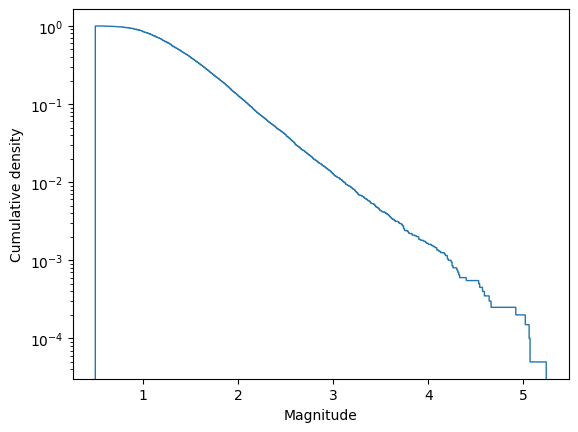

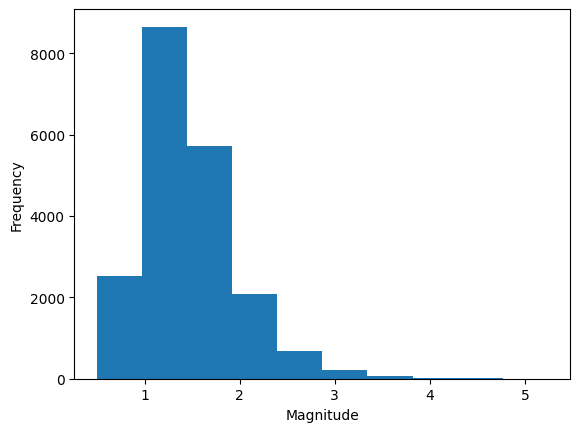

In [22]:
fig, ax = plt.subplots()
ax.hist(
    eq["mag"], bins=len(eq),
    histtype="step", density=True, log=True,
    cumulative=-1)
ax.set_xlabel("Magnitude")
ax.set_ylabel("Cumulative density")
plt.show()

# We can compoare the cumulative density plot to the regular histogram of frequency and magnitude
fig, ax = plt.subplots()
ax.hist(eq["mag"])
ax.set_xlabel("Magnitude")
ax.set_ylabel("Frequency")
plt.show()

These exploratory plots look reasonable (no strange humps in the data) so we can plot the cumulative frequency-magnitude relation. To do this we need to calculate how often each magnitude appears in the dataset. We can do this using a handy object in Pythons native collections library, called Counter:

In [23]:
from collections import Counter

counted_magnitudes = Counter(eq["mag"])

# Print the most common 10 magnitudes
print(counted_magnitudes.most_common(10))

[(1.0, 377), (1.3, 358), (1.2, 347), (1.1, 290), (1.4, 246), (0.9, 242), (1.5, 228), (1.28, 221), (1.21, 194), (1.17, 193)]


This is useful because it gives us a list of the magnitude and the number of occurrences of that magnitude. What we actually want is magnitudes and the number of occurrences of that magnitude and any magnitude above that magnitude (i.e. the exceedance). To do that we will:
1. Create a unique set of all the magnitudes



In [24]:
magnitudes = set(eq["mag"])

2. Make a sorted list from this set:

In [25]:
magnitudes = sorted(list(magnitudes), reverse=True)

3. Initialise an empty array in which we will put the cumulative density function

In [26]:
density = np.zeros(len(magnitudes))

4. Loop through the magnitudes from largest to smallest and add the number of occurrences of that magnitude to the total occurrences of the previous magnitude bin:

In [27]:
density[0] = counted_magnitudes[magnitudes[0]]
for i, magnitude in enumerate(magnitudes[1:]):
    density[i + 1] = density[i] + counted_magnitudes[magnitude]

Let's check that that looks okay by plotting it:

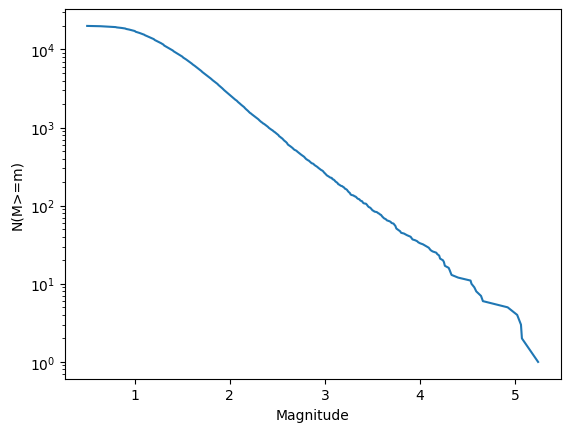

In [28]:
fig, ax = plt.subplots()
ax.semilogy(magnitudes, density)
ax.set_ylabel("N(M>=M)")
ax.set_xlabel("Magnitude")
plt.show()

This looks good so now let's fit a line to it. We can use numpy's solvers to do this. Because this is a nice simple equation we will use the numpy.polyfit function which finds the least squares polynomial fit (i.e. it finds the best fitting curve to a given set of points by minimizing the sum of squares):

In [29]:
coefficients, residual, rank, singular_values, rcondition = np.polyfit(
    magnitudes, np.log10(density), deg=1, full=True)
b, a = coefficients
print(f"a={10**a:.2f}, b={b:.2f}")

a=134704.17, b=-0.90


Let's estimate the density from our calculated parameter values and see how well it fits the data:

In [30]:
# To make our lives easier we will convert our magnitudes to a numpy array:
magnitudes = np.array(magnitudes)
estimated_density = 10 ** (a + (magnitudes * b))

Now let's see if it fits!

*Note that here we're using a plot called 'semilogy' which has a pre-defined layout in which the y-axis is changed to log scaling.*

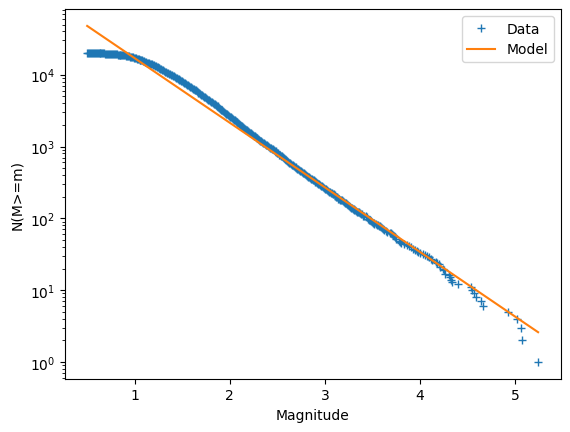

In [37]:
fig, ax = plt.subplots()
ax.semilogy(
    magnitudes, density, marker="+", linestyle="None",
    label="Data")
ax.semilogy(magnitudes, estimated_density, label="Model")
ax.set_ylabel("N(M>=M)")
ax.set_xlabel("Magnitude")
ax.legend()
plt.show()

Recall that we can use the residual (which is the sum of the squares of the fit errors) to assess our goodness of fit, so the lower the value the better.

In [ ]:
print(residual)

***Do you think this looks to be a good fit? What could you do to improve the fit?***

##Sensitivity of the powerlaw fit to 'xmin'
So far we've been fitting the powerlaw distribution to all of the data. You should have noticed that the model does not fit particularly well for lower values of x. Therefore we can potentially improve our estimation of the b-value by fitting the model to a large value of x (termed xmin).

Now, you need to look at the model fit above, and select a more appropriate xmin value and see if we can improve the powerlaw fit.

To fit the model to values equal to or above xmin, we're going to combine the earthquake magnitude and density data into a single dataframe to make it easier to work with, subsample the data according to the value of xmin we specify, and then fit a powerlaw distribution.

1. Merge the magnitude and density data into a single dataframe

In [32]:
mag_dens = pd.DataFrame({'mag': magnitudes, 'density': density}, columns=['mag', 'density'])

2. Subsample this dataframe using a value of xmin that you specify. I've entered '3' below, but you might want to change this to something more sensible.

In [33]:
mag_dens_xmin = mag_dens[mag_dens.mag >= 3] # note that I have renamed the subsampled dataframe to ensure that we don't overwrite 'mag_dens'

Now fit the model to this subsampled dataset

In [34]:
coefficients, residual, rank, singular_values, rcondition = np.polyfit(
        mag_dens_xmin.mag, np.log10(mag_dens_xmin.density), deg=1, full=True)
b, a = coefficients
print(f"b={b:.2f}")
print(f"residual={residual}")
print(f"a={10**a:.2f}")

b=-0.95
residual=[0.21352527]
a=182895.12


In [35]:
estimated_density_1 = 10 ** (a + (mag_dens_xmin.mag * b))

Now let's see how well this new model fits....

In [ ]:
fig, ax = plt.subplots()
ax.semilogy(
    magnitudes, density, marker="+", linestyle="None",
    label="Data")
ax.semilogy(mag_dens_xmin.mag, estimated_density_1, label="Model xmin = 3", color = 'g')
ax.semilogy(magnitudes, estimated_density, label="Model")
ax.set_ylabel("Cumulative density")
ax.set_xlabel("Magnitude")
ax.legend()
plt.show()

In [ ]:
print(residual)

Now, have a play around with changing xmin and look how it alters the residual value.

***What do you think is a reasonable value of xmin for this dataset?***

#Extra tasks

See if you can 'borrow' some of the code from Part 1 to map out the earthquake data we've been working with today.

***Are there any  distinctive spatial patterns? ***

Have a go out downloading data for a different location by changing the search parameters.

***Does the b-value change over space?***

You could also try downloading data for a different time perod.

***How sensitive is the b-value to the time window used? Why?***